In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [140]:
import os

In [141]:
os.getcwd()

'/Users/sunnycao/Desktop/Project/SQL/COVID-19'

In [142]:
movies = pd.read_csv('/Users/sunnycao/Desktop/Project/SQL/COVID-19/movies 2.csv')

In [143]:
# Check dataset
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [144]:
# Data cleaning, check for any missing data
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{}: {}%'.format(col,pct_missing))


name: 0.0%
rating: 0.010041731872717789%
genre: 0.0%
year: 0.0%
released: 0.0002608242044861763%
score: 0.0003912363067292645%
votes: 0.0003912363067292645%
director: 0.0%
writer: 0.0003912363067292645%
star: 0.00013041210224308815%
country: 0.0003912363067292645%
budget: 0.2831246739697444%
gross: 0.02464788732394366%
company: 0.002217005738132499%
runtime: 0.0005216484089723526%


In [145]:
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [146]:
movies = movies.dropna()

In [147]:
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{}: {}%'.format(col,pct_missing))

name: 0.0%
rating: 0.0%
genre: 0.0%
year: 0.0%
released: 0.0%
score: 0.0%
votes: 0.0%
director: 0.0%
writer: 0.0%
star: 0.0%
country: 0.0%
budget: 0.0%
gross: 0.0%
company: 0.0%
runtime: 0.0%


In [148]:
movies.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [149]:
# Looking for datatype for columns
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [150]:
# Change data type of columns
movies['budget'] = movies['budget'].astype('int64')

movies['gross'] = movies['gross'].astype('int64')



In [151]:

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [152]:
# Create correct year column
movies['yearcorrect'] = movies['released'].str.extract(pat = '([0-9]{4})',expand=False).astype(int)


In [153]:
# Delete original year column
movies.drop('year',axis=1,inplace=True)

In [154]:
# Sort values by gross desc
movies.sort_values(by = 'gross',ascending=False).head()


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [ ]:
# Scrolling
pd.set_option('display.max_rows',None)

In [155]:
# Show duplicate values
movies['company'].sort_values(ascending=False).head(20)

7129                        thefyzz
5664                    micro_scope
4007                       i5 Films
6793                     i am OTHER
6420                           erbp
3776                 double A Films
3330    Zucker Brothers Productions
146                Zoetrope Studios
352                Zoetrope Studios
724                Zoetrope Studios
332                Zoetrope Studios
520                Zoetrope Studios
2213             Zeta Entertainment
4297        Zentropa Entertainments
5471        Zentropa Entertainments
3698        Zentropa Entertainments
4829        Zentropa Entertainments
5885        Zentropa Entertainments
1180           Zenith Entertainment
5180                Zazen Produções
Name: company, dtype: object

In [120]:
# Drop any duplicate if needed
movies['company'].drop_duplicates().sort_values(ascending=False).head(20)

7129                        thefyzz
5664                    micro_scope
4007                       i5 Films
6793                     i am OTHER
6420                           erbp
3776                 double A Films
3330    Zucker Brothers Productions
146                Zoetrope Studios
2213             Zeta Entertainment
3698        Zentropa Entertainments
1180           Zenith Entertainment
5180                Zazen Produções
1321       Zanuck/Brown Productions
1329    Zacharias-Buhai Productions
789       Young Sung Production Co.
5125     Young Hannibal Productions
5499                    Yellow Bird
4618                 Yash Raj Films
4990      Yari Film Group Releasing
5410          Yari Film Group (YFG)
Name: company, dtype: object

(0.0, 373799700.0)

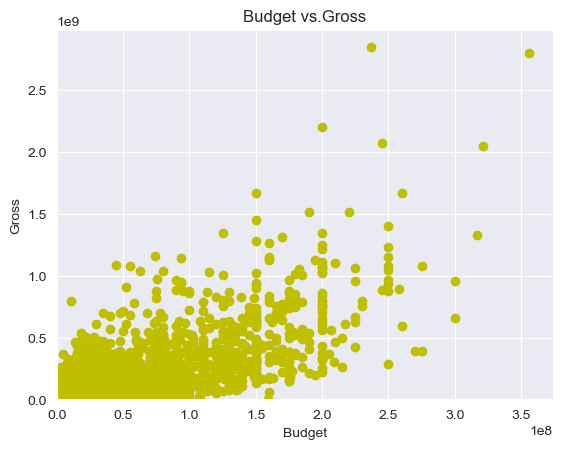

In [156]:
# Scatter plot for budget vs. gross
plt.scatter(x=movies['budget'],y=movies['gross'],c='y')
plt.title('Budget vs.Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.ylim(0)
plt.xlim(0)

(0.0, 373799700.0)

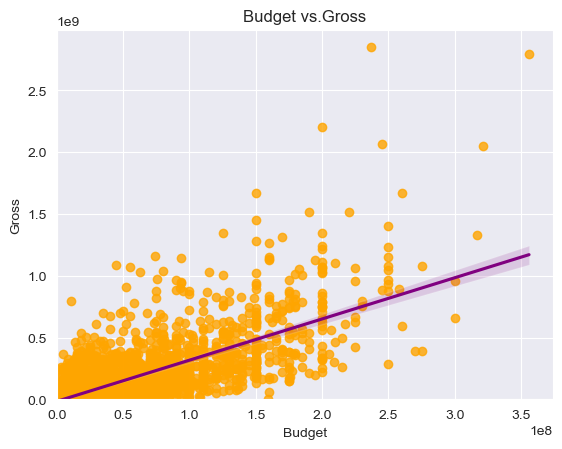

In [157]:
sns.set_style('darkgrid')
sns.regplot(x='budget',y='gross',data=movies,scatter_kws={'color':'orange'},line_kws={'color':'purple'})

plt.title('Budget vs.Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.ylim(0)
plt.xlim(0)

In [158]:
# check for correlation
movies.corr()

,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Text(52.315972222222214, 0.5, 'Movie Features')

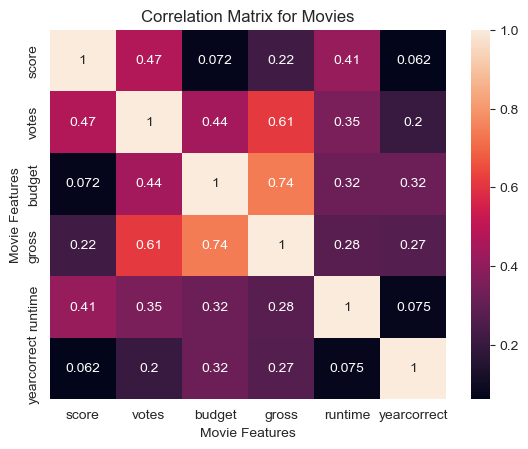

In [159]:
# Heatmap for correlations
sns.heatmap(movies.corr(),annot=True);
plt.title('Correlation Matrix for Movies')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')


In [160]:
movies_numerized = movies


for col_name in movies_numerized.columns:
    if(movies_numerized[col_name].dtype == 'object'):
        movies_numerized[col_name]= movies_numerized[col_name].astype('category')
        movies_numerized[col_name] = movies_numerized[col_name].cat.codes
        
movies_numerized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


In [161]:
movies_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
released,-0.006152,0.018083,0.022142,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687
country,-0.025490,0.008230,-0.009164,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.073569


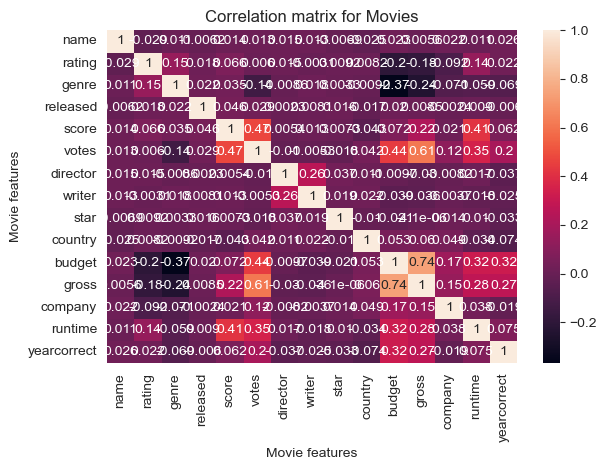

In [162]:
correlation_matrix = movies_numerized.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.tight_layout()

plt.show()


In [165]:
corr_pairs = correlation_matrix.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.029234
      genre       0.010996
      released   -0.006152
      score       0.014450
dtype: float64

In [166]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
rating       company       -0.092357
company      rating        -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
company      genre         -0.071334
genre        company       -0.071334
yearcorrect  genre         -0.069147
genre        yearcorrect   -0.069147
runtime      genre         -0.059237
genre        runtime       -0.059237
country      score         -0.043051
score        country       -0.043051
budget       writer        -0.039466
writer       budget        -0.039466
director     yearcorrect   -0.037371
yearcorrect  director      -0.037371
writer       gross         -0.035885
g

In [167]:
sorted_pairs[sorted_pairs > 0.5]

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and Budges have the highest correlation with Gross Earnings